# Lead Scoring - Case Study

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

#### Goal:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads

2. Model should be able to adjust to the company's requirement changes in the future  also should keep the accuracy also

In [2]:
##Import the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.feature_selection import RFE

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## 1. Read & Understand the Data 

In [3]:
leads = pd.read_csv("Leads.csv")
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

In [7]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0 #checking for duplicate values

True

#### There are no duplicate values

In [8]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# identifying the Null Values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
Conversion_rate = round((sum(leads['Converted'])/len(leads['Converted'].index))*100, 2)
print("The conversion rate of leads is ", Conversion_rate)

The conversion rate of leads is  38.54


In [12]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [13]:
nullper = round((leads.isnull().sum()/len(leads.index))*100,2).sort_values(ascending=False)
nullcolumns = nullper[nullper>=40]
nullcolumns

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Index           45.65
dtype: float64

In [14]:
leads_df= leads.drop(columns=nullcolumns.index)

In [15]:
leads_df.shape

(9240, 28)

In [16]:
leads_df.nunique() ##to find the unique values in each column

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

#### we could see from the output that there are few columns which has only 1 unique value with no null values so we can drop them as they wont contribute much to the model.

In [17]:
leads_df= leads_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [18]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### We could see that there are few more column which have null values greater than 35%. 
#### Let's check that columns individually.

In [19]:
## 1. Specialization 
leads_df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [20]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### In Specialization column, there are 36% null values hence we will replace the null values with 'Others'.

In [22]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan,'Others')

In [23]:
leads_df.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [24]:
## 2. Tags
leads_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [25]:
leads_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Tag columns contain highest number of values of "will revert after reading mail" and 36% of null values.
#### Tag column doesn't imply much on the decision of potential customer. Hence we can drop tag.

In [27]:
leads_df = leads_df.drop('Tags', axis=1)

In [28]:
## 3. City
leads_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [29]:
leads_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

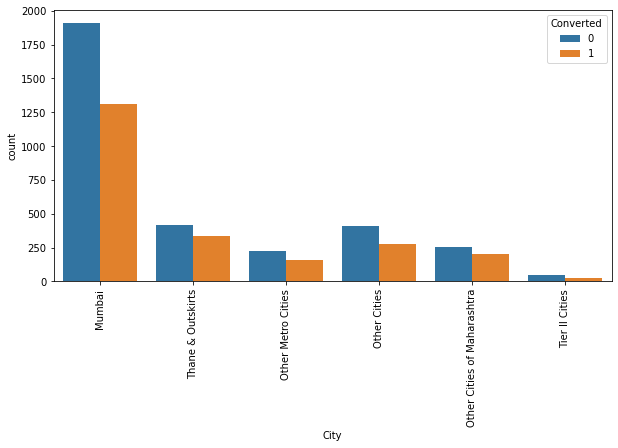

In [31]:
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Checking Unique Categorical Columns

In [33]:
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [34]:
leads_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [35]:
## Almost 95% of the data is skewed towards India so there is data imbalance, hence we can drop the column.
leads_df = leads_df.drop('Country', axis=1)

In [36]:
## What is your current occupation column
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [37]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [38]:
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [39]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
City      

#### There are few more missing values.
#### Categorical variables we impute with mode.
#### Numerical variables we impute with median.

### Imputing Categorical variables 

In [42]:
leads_df['Lead Source'].value_counts(normalize=True) 

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [43]:
#Imputing missing values in 'Lead Source' with mode. 
leads_df['Lead Source'].fillna('Google',inplace=True)

#### we can see there is both Google and google as values, hence we will replace "google" with Google to avoid duplicate.

In [45]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')

In [46]:
leads_df['Last Activity'].value_counts(normalize=True) 

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [47]:
#Imputing missing values in 'Last Activity' with mode. 
leads_df['Last Activity'].fillna('Email Opened',inplace=True)

In [48]:
leads_df['What is your current occupation'].value_counts(normalize=True) 

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [49]:
#Replacing categorical columns with Unemployed in Current Occupation 
leads_df['What is your current occupation'].fillna('Unemployed', inplace = True)

In [50]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [51]:
leads_df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

#### After imputing 'What matters most to you in choosing a course' column, 99% of the values pointing to "Better Career Prospects". Hence this column can be dropped as this field wont contribute any value to the model.

In [52]:
 leads_df = leads_df.drop('What matters most to you in choosing a course', axis=1)

In [53]:
#### Analysing 'Search' Column
leads_df['Search'].value_counts(normalize=True) 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [54]:
#### Analysing 'Newspaper Article' Column
leads_df['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [55]:
#### Analysing 'X Education Forums' Column
leads_df['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [56]:
#### Analysing 'Newspaper' Column
leads_df['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [57]:
#### Analysing 'Digital Advertisement' Column
leads_df['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [58]:
#### Analysing 'Through Recommendations' Column
leads_df['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [59]:
#### Analysing 'A free copy of Mastering The Interview' Column
leads_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [60]:
#### Analysing 'Last Notable Activity' Column
leads_df['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

#### After the analysis, we could find the for columns 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations' - are having most of the values (~99%) are in one catagory. This causes high imbalance in data.
#### Hence these columns can also be dropped for better model creation.

In [61]:
## Dropping the selected cells

leads_df = leads_df.drop(['Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations'], axis=1)

### Imputing numerical columns

In [63]:
leads_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Both mean & median is 3. Hence imputing with value 3.

In [65]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(),inplace=True)

In [66]:
#Page Per Views is also a numerical column, hence we check the distribution first.
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Both mean & median is 2. Hence imputing with value 2.

In [68]:
#Imputing missing values with mean/median which is 2. 
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(),inplace=True)

In [69]:
round(leads_df.isnull().sum() * 100 / len(leads_df),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Rechecking null values after data cleaning, there are no null values. Hence data is cleaned.

In [70]:
leads_df = leads_df.drop(['Last Notable Activity'], axis=1)

## 3. Exploratory Data Analysis

### Univariate Analysis

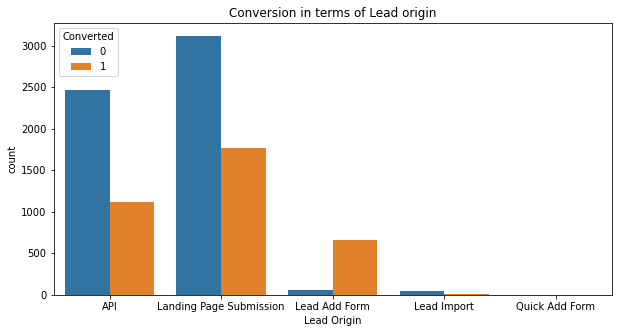

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Lead origin")
plt.show()

#### 1. Lead Add Form has the highest Percentage of conversions
#### 2. API and Landing Page Submission have less conversion rate but has maximum number of leads counts.
#### 3. Lead Import has the least conversions and leads count.
#### To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission. Also,generate more leads from Lead Add form since they have a very good conversion rate.

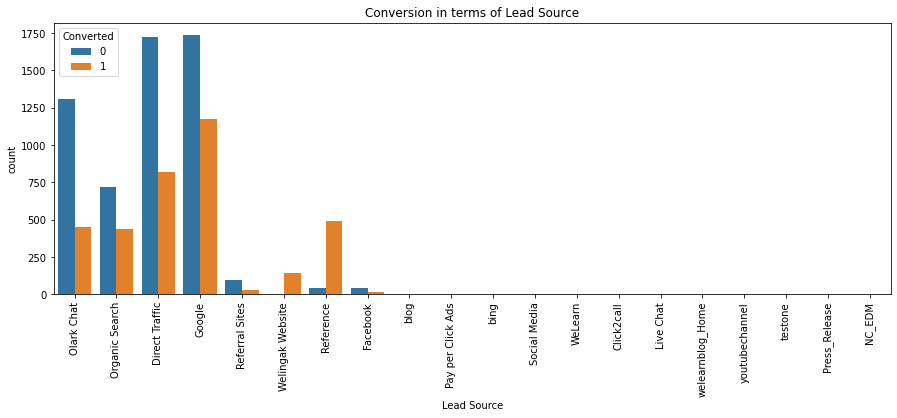

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

#### 1. Google and direct traffic has maximum number of leads but their conversion is less.
#### 2. Welingak website and References has highest conversions but the number of leads through that source is very less.
#### 3. Olark chat and organic search has significant number of leads but their conversion rate is less.
#### 4. Lead source in other category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' has very less leads.

#### To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source .Also , generate more leads from reference and welingak website since they have a very good conversion rate.

### Specialization

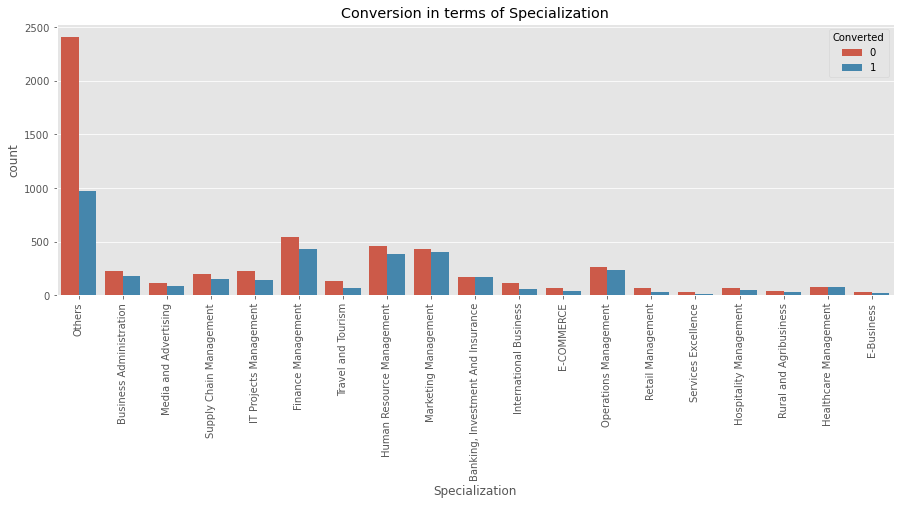

In [173]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Specialization")
plt.xticks(rotation = 90)
plt.show()

#### 1. We can see that most of the people who have not mentioned the specialization did not convert which shows they are less interested.
#### 2. People who have mentioned the specializations have better conversions.
####  3. In that Banking,Investment & insurance have almost 50% conversion rate. Other specializations like Finance, HR,Operations,Marketing also have comparitively better conversion though it is less.

### Occupation

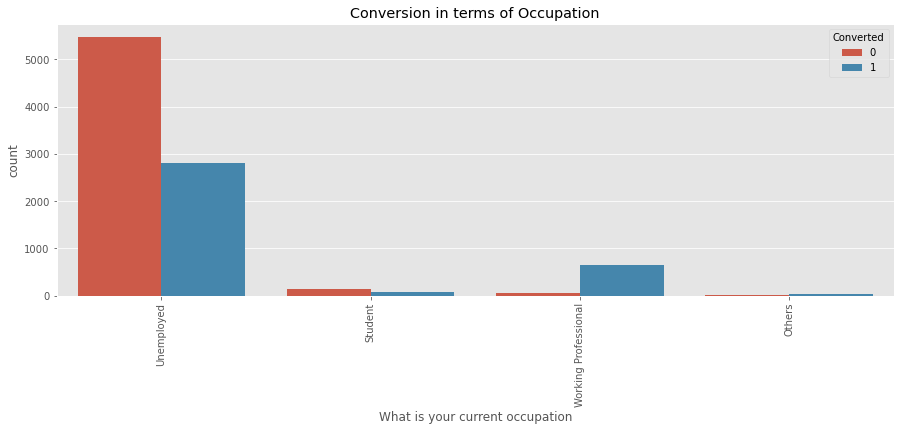

In [174]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Occupation")
plt.xticks(rotation = 90)
plt.show()

#### 1. It shows that unemployed people are the larger group of leads but conversion is higher in Professional group which is a smaller group.
####  2. This can be because of the higher fees for the course which unemployed people cannot afford and also professional people always look for upskilling courses.

### Numerical variables

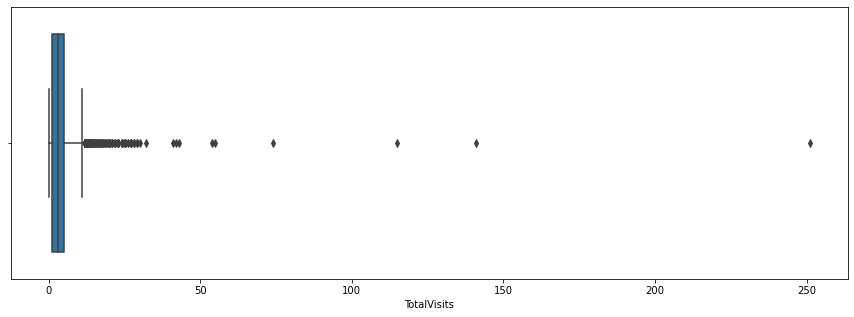

In [78]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

In [79]:
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

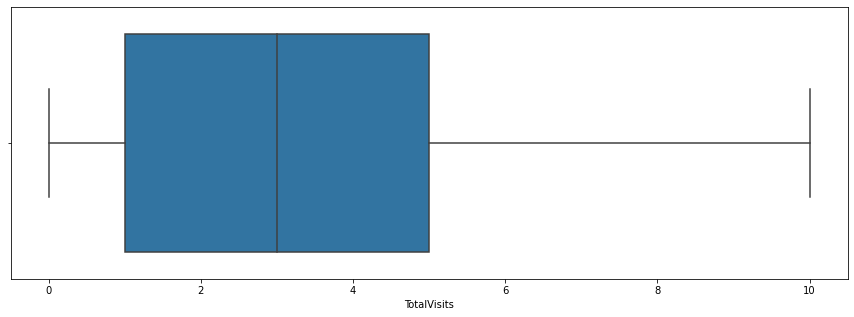

In [80]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

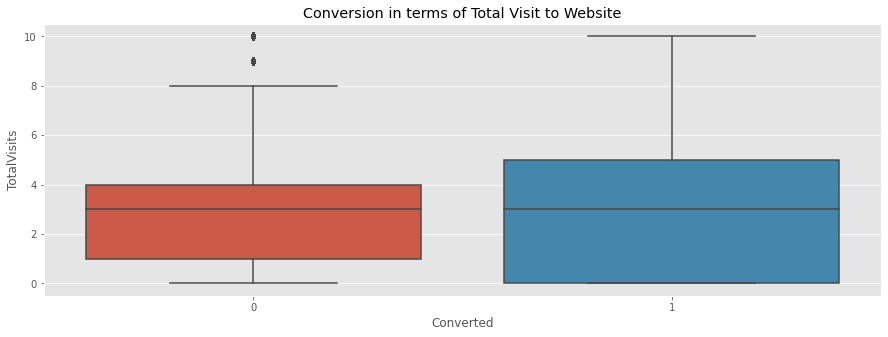

In [175]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.title("Conversion in terms of Total Visit to Website")
plt.show()

#### People who visits the platform have almost similar chances of getting converted and not getting converted as the median for both plots is along the same line.

### Time spent on website

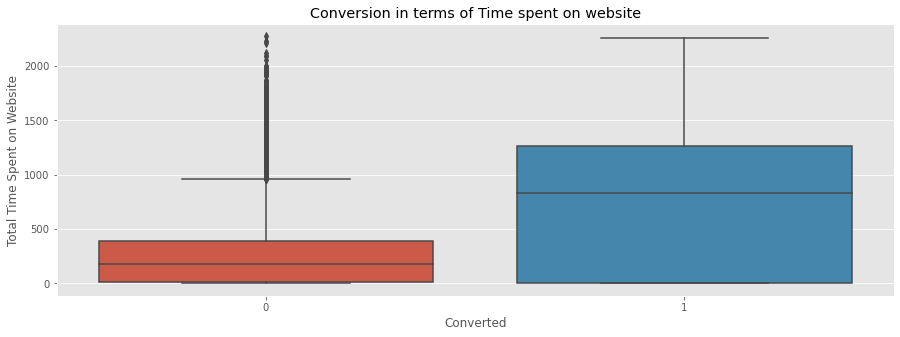

In [176]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.title("Conversion in terms of Time spent on website")
plt.show()

#### This shows that people who spend more time on the website have higher chances of getting converted to users.

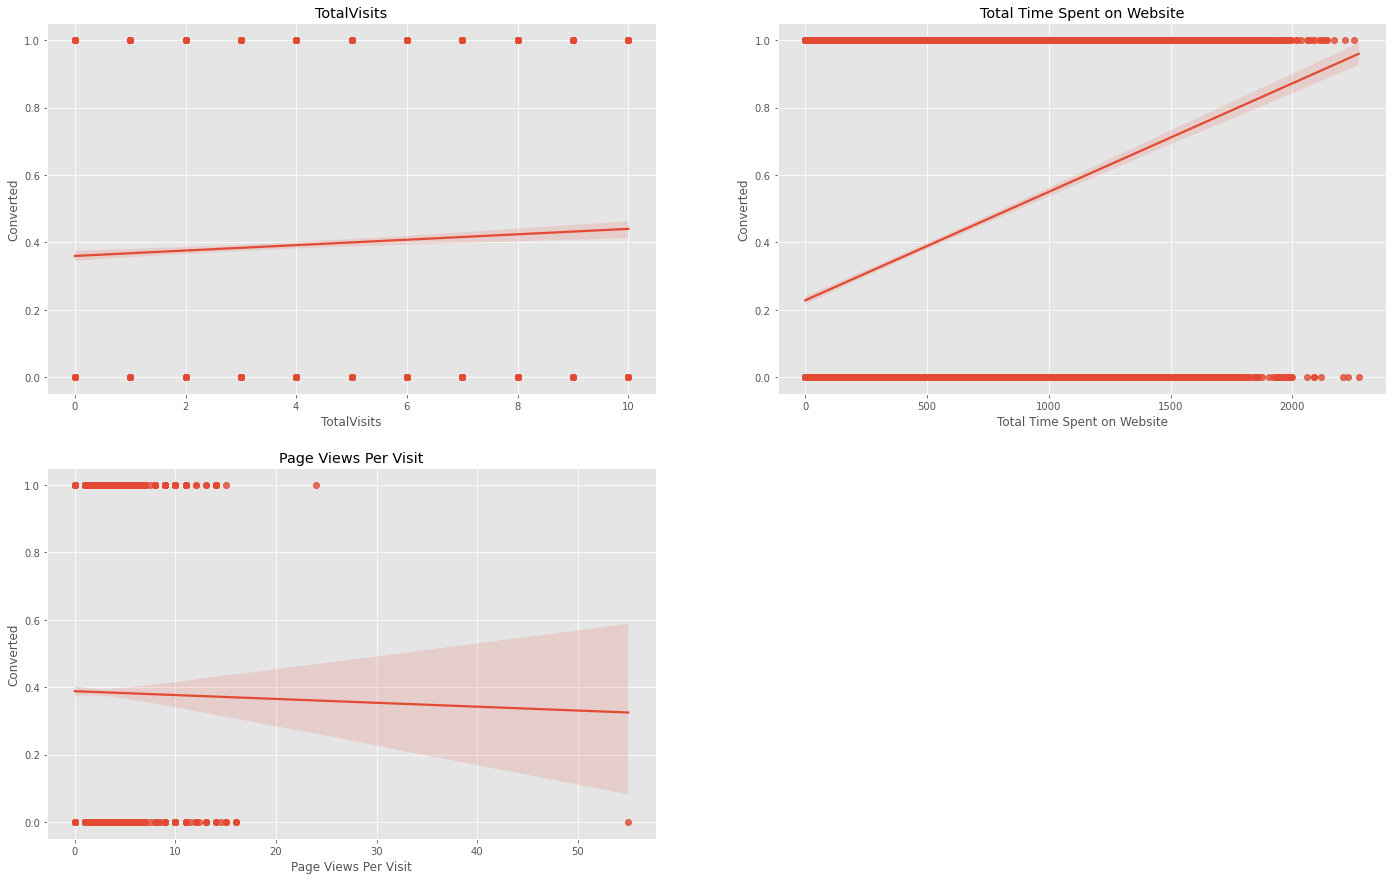

In [85]:
## Analysis on the Numeric variables

plt.figure(figsize=(24,15))
plt.style.use('ggplot')

plt.subplot(2,2,1)
plt.title("TotalVisits")
sns.regplot(data=leads_df,y="Converted",x="TotalVisits")


plt.subplot(2,2,2)
plt.title("Total Time Spent on Website")
sns.regplot(data=leads_df,y="Converted",x="Total Time Spent on Website")

plt.subplot(2,2,3)
plt.title("Page Views Per Visit")
sns.regplot(data=leads_df,y="Converted",x="Page Views Per Visit")


plt.show()

### Correlation

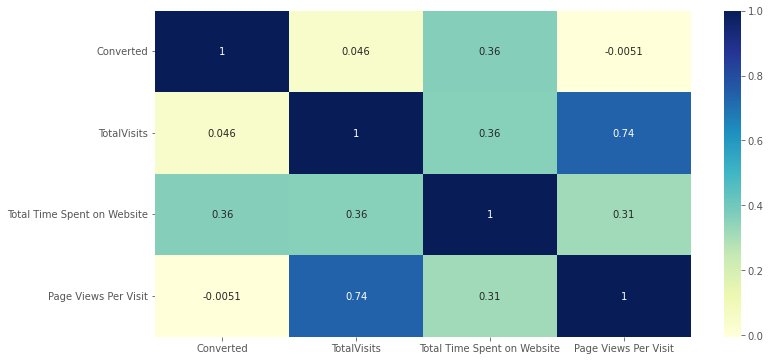

In [87]:
plt.figure(figsize = (12,6))
correlation_matrix = np.zeros_like(leads_df.corr(),dtype=np.bool)
sns.heatmap(leads_df.corr(),annot = True, cmap="YlGnBu")
plt.show()

## 4. Data Preparation


In [88]:
### Analysing the remaining columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [89]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,No


In [90]:
## Get the Catagory Columns for conversion
conv_cols= ['Do Not Email','Do Not Call','A free copy of Mastering The Interview']

In [91]:
## convert the catagory columns
def binary_map(x):
    return x.map({'Yes':1,'No':0})

## Taking a new copy of leads data file
leads_df_new = leads_df.copy()

leads_df_new[conv_cols] = leads_df_new[conv_cols].apply(binary_map)


In [92]:
leads_df_new.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0


In [93]:
# Categorical variables list
dummy_cols = list(leads_df_new.columns[leads_df_new.dtypes == 'object'])
dummy_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [94]:
# create dummy variables

dummies = pd.get_dummies(leads_df_new[dummy_cols], drop_first=True)

leads_df_new = pd.concat([leads_df_new, dummies], axis=1)

leads_df_new = leads_df_new.drop(dummy_cols,1) # drop the original variables

In [95]:
## verify modified leads dataset

leads_df_new.head(5)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Split the Dataset

In [96]:
# Assign X
X = leads_df_new.drop(['Converted'],axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
# Assign y
y = leads_df_new['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Split data into X and y sets - spliting percentage 70% and 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

In [99]:
X_train.shape

(6468, 71)

In [100]:
y_train.shape

(6468,)

### Feature scaling

In [101]:
scaler = StandardScaler()

In [102]:
## assign numerical variable

num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [103]:
#Applying scaler to transform the numerical values

X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   Do Not Call                                           6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   A free copy of Mastering The Interview                6468 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 8   Lead Origin_Lead Import                               6

In [104]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,-1.149699,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0,0.299722,0.005716,-0.470569,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3516,0,0,0.662077,-0.691418,0.070401,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0,0,0.662077,1.365219,1.226321,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3934,0,0,-1.149699,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
# check the conversion rate
conv = (sum(leads_df_new['Converted'])/len(leads_df_new['Converted'].index))*100
conv

38.53896103896104

#### current conversion rate 38%

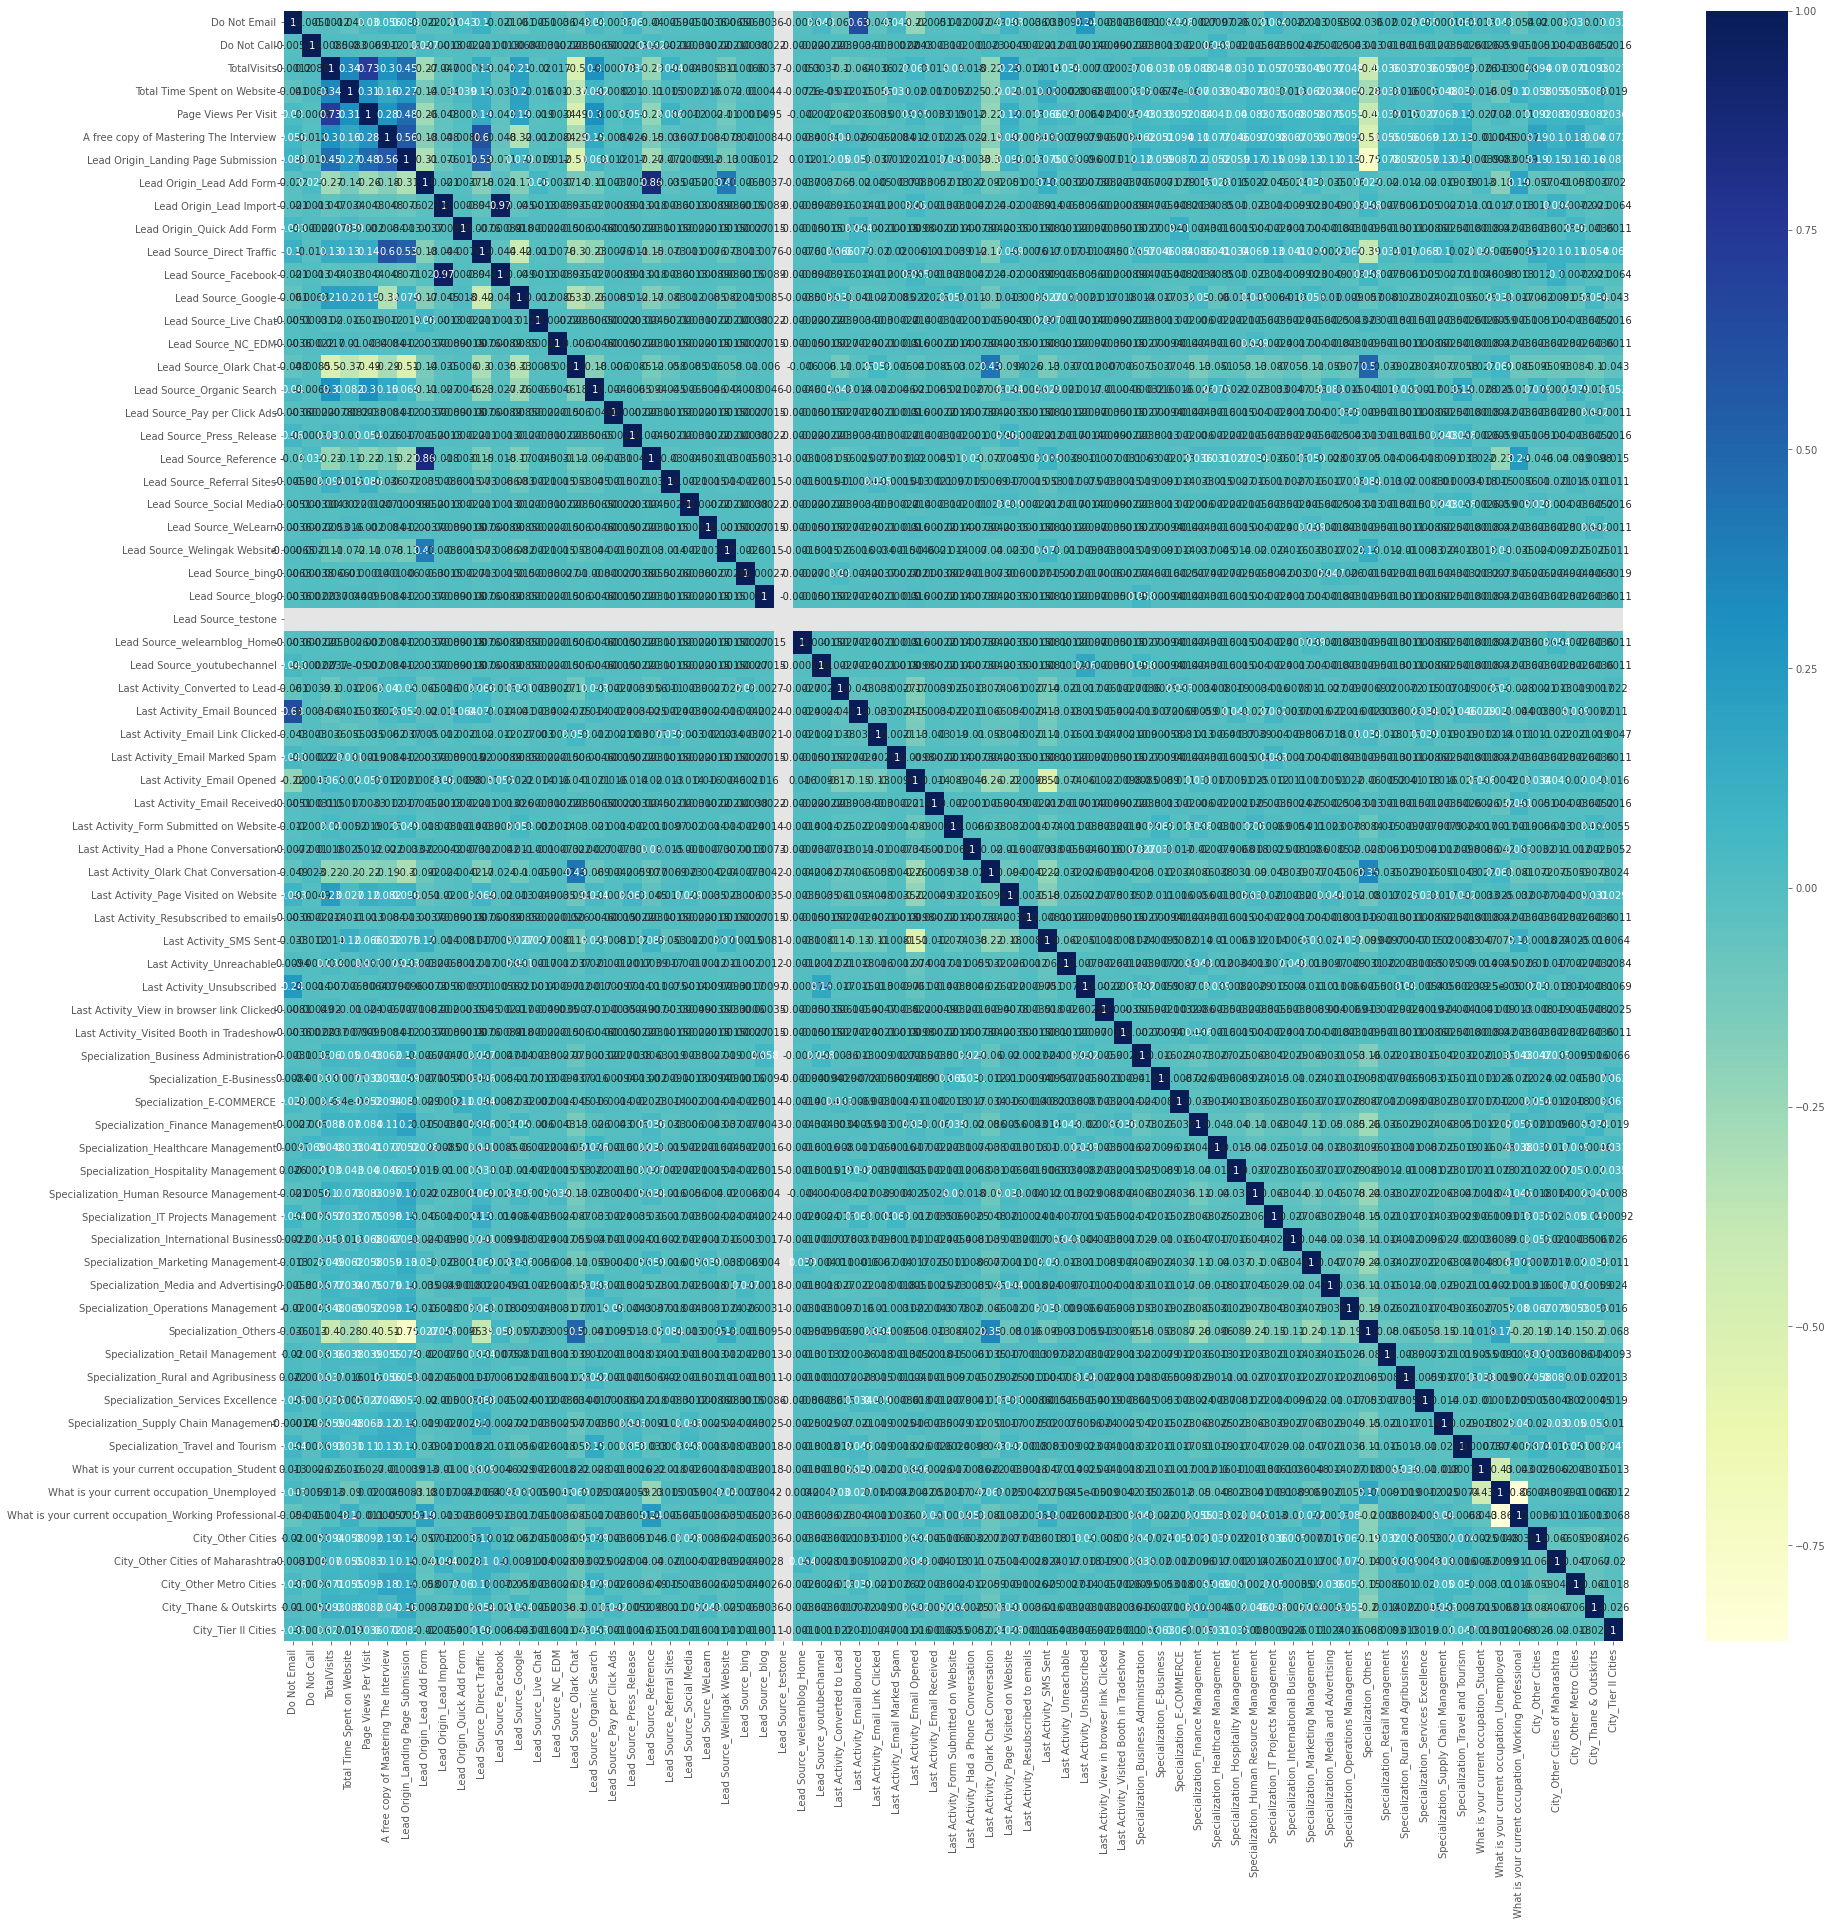

In [106]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 5. Building model using RFE and Automated Methods

In [107]:
# Import 'LogisticRegression'
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')

# Running RFE with 15 variables as output

rfe = RFE(logreg,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False])

In [109]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

rfe.ranking_

array([ 1, 11, 21,  1, 22, 28,  1,  1, 16, 41, 15,  7, 19, 34, 24,  1, 18,
       38, 35, 43, 17,  8, 20,  1, 37, 14, 57, 26, 30,  1,  1,  6, 31, 53,
       42,  2,  1,  1,  5,  1,  1, 49, 10, 13, 39, 40, 54, 25, 32, 36,  1,
       45, 29, 12, 46, 56, 44,  1, 23,  9, 55, 47, 48,  4,  3,  1, 50, 51,
       27, 52, 33])

In [110]:
cols = X_train.columns[rfe.support_]
print(cols)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')


In [111]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activit

In [112]:
## Calculate the VIF of variables using the generic function

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [113]:
X_train_rfe = X_train[cols]
X_train_rfe

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
1871,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,0,0,0,0,0,0,0,1,0
3516,0,-0.691418,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0,1.365219,1,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0
79,0,0.404601,0,1,0,0,0,0,0,0,0,0,1,0,1
8039,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,1,0
6936,0,-0.449891,1,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
13,Specialization_Others,2.09
4,Lead Source_Olark Chat,2.04
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.78
11,Last Activity_SMS Sent,1.59
2,Lead Origin_Landing Page Submission,1.53
3,Lead Origin_Lead Add Form,1.47
9,Last Activity_Olark Chat Conversation,1.47
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24


In [115]:
X_train_sm = sm.add_constant(X_train_rfe)
logsm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
ver = logsm.fit()
ver.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.3
Date:                Tue, 24 Jan 2023   Deviance:                       5400.6
Time:                        11:32:10   Pearson chi2:                 1.04e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3211      0.123     -2.615      0.009      -0.562      -0.080
Do Not Email                                            -1.1644      0.188     -6.196      0.000      -1.533      -0.796
Total Time Spent on Website                              1.0635      0.039     27.223      0.000       0.987       1.140
Lead Origin_Landing Page Submission                     -1.1049      0.127     -8.726      0.000      -1.353      -0.857
Lead Origin_Lead Add Form                                3.0638      0.203     15.122      0.000       2.667       3.461
Lead Source_Olark Chat                                   1.0027      0.121      8.307      0.000       0.766       1.239
Lead Source_Welingak Website                             2.4969      0.751      3.325      0.001       1.025       3.969
Last Activity_Converted to Lead                         -1.1772      0.218     -5.405      0.000      -1.604      -0.750
Last Activity_Email Bounced                             -0.8190      0.345     -2.374      0.018      -1.495      -0.143
Last Activity_Had a Phone Conversation                   2.1165      0.678      3.122      0.002       0.788       3.445
Last Activity_Olark Chat Conversation                   -1.3542      0.169     -8.026      0.000      -1.685      -1.024
Last Activity_Resubscribed to emails                    21.9704   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.2515      0.074     16.884      0.000       1.106       1.397
Specialization_Hospitality Management                   -0.9965      0.323     -3.089      0.002      -1.629      -0.364
Specialization_Others                                   -1.1442      0.122     -9.415      0.000      -1.382      -0.906
What is your current occupation_Working Professional     2.6728      0.191     13.992      0.000       2.298       3.047
========================================================================================================================
"""

In [116]:
###'Last Activity_Resubscribed to emails' field is having high P-Values , dropping the field

X_train_new = X_train_rfe.drop(['Last Activity_Resubscribed to emails'], axis = 1)

In [117]:
# calculate VIF
calculateVIF(X_train_new)

,Features,VIF
12,Specialization_Others,2.09
4,Lead Source_Olark Chat,2.04
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.78
10,Last Activity_SMS Sent,1.59
2,Lead Origin_Landing Page Submission,1.53
3,Lead Origin_Lead Add Form,1.47
9,Last Activity_Olark Chat Conversation,1.47
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24


In [118]:
# Refit the model

X_train_sm = sm.add_constant(X_train_new)
logsm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
ver = logsm.fit()
ver.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.9
Date:                Tue, 24 Jan 2023   Deviance:                       5403.8
Time:                        11:32:10   Pearson chi2:                 1.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3219      0.123     -2.621      0.009      -0.563      -0.081
Do Not Email                                            -1.1647      0.188     -6.198      0.000      -1.533      -0.796
Total Time Spent on Website                              1.0634      0.039     27.221      0.000       0.987       1.140
Lead Origin_Landing Page Submission                     -1.1033      0.127     -8.715      0.000      -1.351      -0.855
Lead Origin_Lead Add Form                                3.0641      0.203     15.124      0.000       2.667       3.461
Lead Source_Olark Chat                                   1.0078      0.121      8.354      0.000       0.771       1.244
Lead Source_Welingak Website                             2.4960      0.751      3.324      0.001       1.024       3.968
Last Activity_Converted to Lead                         -1.1779      0.218     -5.409      0.000      -1.605      -0.751
Last Activity_Email Bounced                             -0.8203      0.345     -2.378      0.017      -1.496      -0.144
Last Activity_Had a Phone Conversation                   2.1159      0.678      3.121      0.002       0.787       3.445
Last Activity_Olark Chat Conversation                   -1.3587      0.169     -8.056      0.000      -1.689      -1.028
Last Activity_SMS Sent                                   1.2498      0.074     16.866      0.000       1.105       1.395
Specialization_Hospitality Management                   -0.9960      0.323     -3.088      0.002      -1.628      -0.364
Specialization_Others                                   -1.1420      0.122     -9.398      0.000      -1.380      -0.904
What is your current occupation_Working Professional     2.6725      0.191     13.991      0.000       2.298       3.047
========================================================================================================================
"""

In [119]:
### the 'Last Activity_Email Bounced' field is having high P-Values , dropping the field

X_train_new = X_train_new.drop(['Last Activity_Email Bounced'], axis = 1)

In [120]:
# calculate VIF
calculateVIF(X_train_new)

,Features,VIF
11,Specialization_Others,2.07
4,Lead Source_Olark Chat,2.04
9,Last Activity_SMS Sent,1.55
2,Lead Origin_Landing Page Submission,1.52
3,Lead Origin_Lead Add Form,1.46
8,Last Activity_Olark Chat Conversation,1.46
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
12,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.11


In [121]:
# Refit the model

X_train_sm = sm.add_constant(X_train_new)
logsm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
ver = logsm.fit()
ver.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.9
Date:                Tue, 24 Jan 2023   Deviance:                       5409.9
Time:                        11:32:10   Pearson chi2:                 1.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3892
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3256      0.123     -2.654      0.008      -0.566      -0.085
Do Not Email                                            -1.4154      0.162     -8.723      0.000      -1.733      -1.097
Total Time Spent on Website                              1.0603      0.039     27.168      0.000       0.984       1.137
Lead Origin_Landing Page Submission                     -1.1080      0.126     -8.764      0.000      -1.356      -0.860
Lead Origin_Lead Add Form                                3.0566      0.203     15.089      0.000       2.660       3.454
Lead Source_Olark Chat                                   1.0040      0.121      8.324      0.000       0.768       1.240
Lead Source_Welingak Website                             2.4891      0.746      3.336      0.001       1.027       3.951
Last Activity_Converted to Lead                         -1.1660      0.218     -5.358      0.000      -1.593      -0.739
Last Activity_Had a Phone Conversation                   2.1430      0.683      3.138      0.002       0.805       3.481
Last Activity_Olark Chat Conversation                   -1.3436      0.169     -7.968      0.000      -1.674      -1.013
Last Activity_SMS Sent                                   1.2745      0.074     17.328      0.000       1.130       1.419
Specialization_Hospitality Management                   -1.0005      0.321     -3.119      0.002      -1.629      -0.372
Specialization_Others                                   -1.1508      0.121     -9.482      0.000      -1.389      -0.913
What is your current occupation_Working Professional     2.6676      0.191     13.962      0.000       2.293       3.042
========================================================================================================================
"""

#### Here the P values are less than 0.05 also VIF also in a dood range.
#### We can finalize this model

In [122]:
cols = X_train_new.columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

<AxesSubplot:>

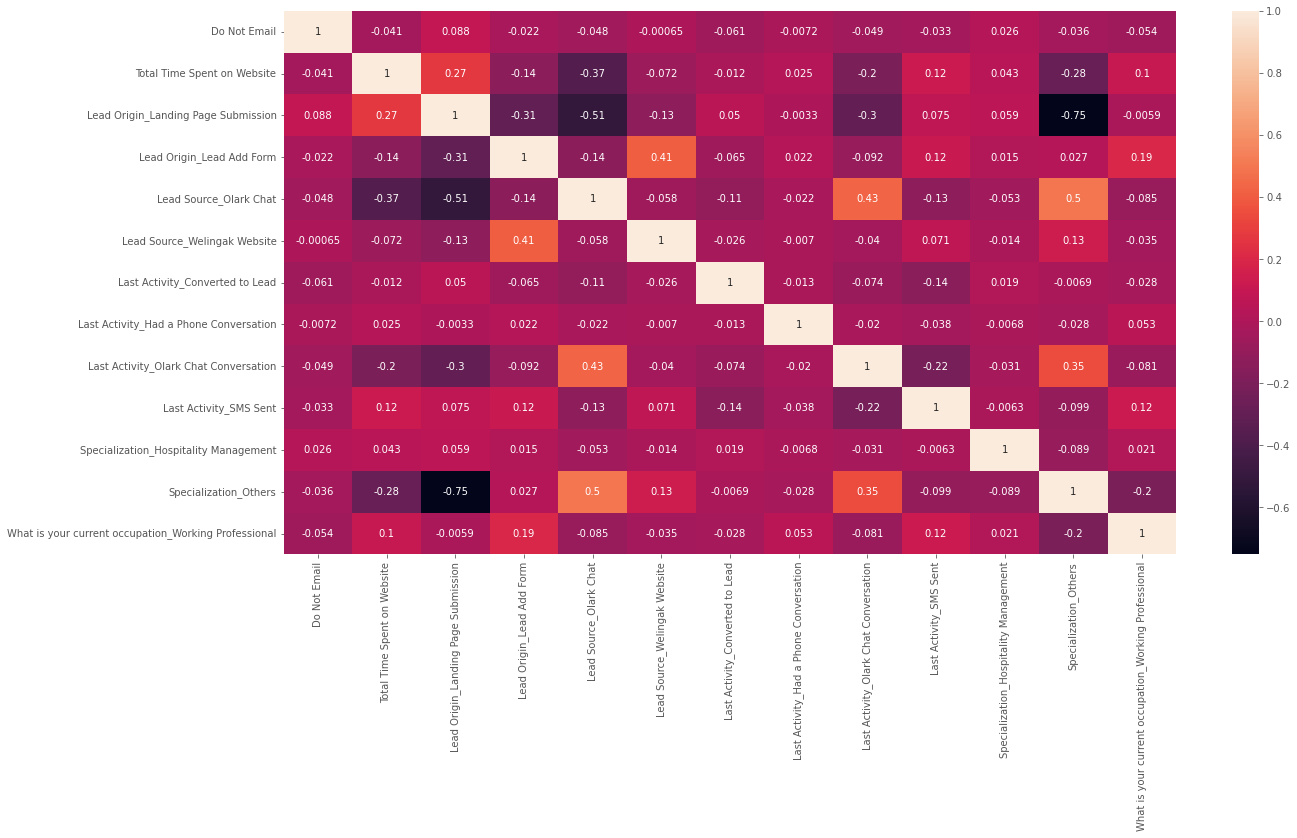

In [123]:
# find correlation

plt.figure(figsize = (20,10))  
sns.heatmap(X_train_new.corr(),annot = True)

In [124]:

# To get predicted values on train set

y_train_predict = ver.predict(X_train_sm)
y_train_predict.head()

1871    0.435290
6795    0.070548
3516    0.230513
8105    0.783866
3934    0.196067
dtype: float64

In [125]:
## Apply reshape

y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.43529029, 0.07054775, 0.23051266, 0.78386625, 0.1960668 ,
       0.98883393, 0.09908514, 0.99930052, 0.11920617, 0.86894312])

In [126]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pr_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_predict})
y_train_pr_final.head()

,Converted,Conversion_Prob
0,0,0.435290
1,0,0.070548
2,0,0.230513
3,0,0.783866
4,0,0.196067


In [127]:
# Substitute 0 or 1 with the cut off as 0.5
y_train_pr_final['Predicted'] = y_train_pr_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pr_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.435290,0
1,0,0.070548,0
2,0,0.230513,0
3,0,0.783866,1
4,0,0.196067,0


## 6. Model Evaluation

In [128]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pr_final.Converted, y_train_pr_final.Predicted )
confusion

array([[3578,  424],
       [ 820, 1646]], dtype=int64)

#### Model accurately identified 3578 records as- Not churn , and 1646 records Churn. 

In [129]:
# identify overall accuracy of the model

metrics.accuracy_score(y_train_pr_final.Converted, y_train_pr_final.Predicted)

0.8076685219542362

#### Model Accuracy is ~81%, which is a good model value.

In [130]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [131]:
# Calculating the sensitivity
TP/(TP+FN)

0.667477696674777

In [132]:
# Calculating the specificity
TN/(TN+FP)

0.8940529735132434

#### With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 68% and specificity of around 89%

## 8. Plotting ROC Curve

In [133]:
# Function for ROC
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot')
    plt.legend(loc="lower right")
    plt.show()

In [134]:
# Calcualte FPR, TPR
fpr, tpr, thresholds = metrics.roc_curve(y_train_pr_final['Converted'], y_train_pr_final['Conversion_Prob'], drop_intermediate = False )

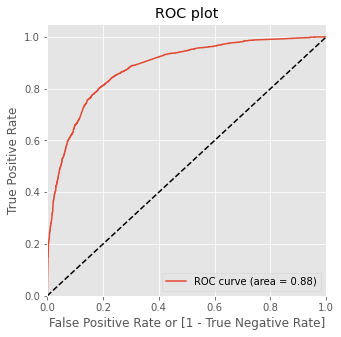

In [135]:
plot_roc(y_train_pr_final['Converted'], y_train_pr_final['Conversion_Prob'])

#### Area under the ROC curve is 0.88.  it is a good value for a model

### Final optimal CutOff Value

In [136]:
#finding the optimal cutoff values for the models to determine the ideal sensitivity and Specificity for the model


# Plot cutoff values
cutoff_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in cutoff_values:
    y_train_pr_final[i] = y_train_pr_final['Conversion_Prob'].apply(lambda x:1 if x>i else 0)
    
y_train_pr_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.435290,0,1,1,1,1,1,0,0,0,0,0
1,0,0.070548,0,1,0,0,0,0,0,0,0,0,0
2,0,0.230513,0,1,1,1,0,0,0,0,0,0,0
3,0,0.783866,1,1,1,1,1,1,1,1,1,0,0
4,0,0.196067,0,1,1,0,0,0,0,0,0,0,0


In [137]:
# Finding sensitivity and specificity for various cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cmatrix = metrics.confusion_matrix(y_train_pr_final.Converted, y_train_pr_final[i] )
    total1=sum(sum(cmatrix))
    
    accuracy = (cmatrix[0,0]+cmatrix[1,1])/total1
    specificity = cmatrix[0,0]/(cmatrix[0,0]+cmatrix[0,1])
    sensitivity = cmatrix[1,1]/(cmatrix[1,0]+cmatrix[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.595238     0.973236     0.362319
0.2          0.2  0.766388     0.890105     0.690155
0.3          0.3  0.796382     0.841038     0.768866
0.4          0.4  0.814780     0.774128     0.839830
0.5          0.5  0.807669     0.667478     0.894053
0.6          0.6  0.801793     0.604217     0.923538
0.7          0.7  0.783241     0.516221     0.947776
0.8          0.8  0.758349     0.416464     0.969015
0.9          0.9  0.708565     0.252636     0.989505


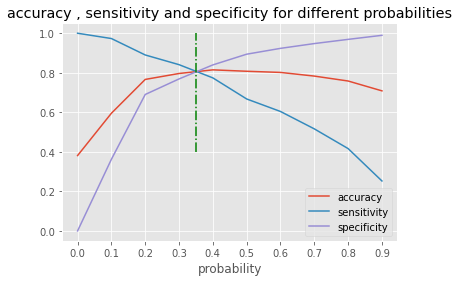

In [138]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

plt.title("accuracy , sensitivity and specificity for different probabilities")

plt.rcParams['figure.figsize'] = [15, 5]

plt.xticks(num)

plt.vlines(x=0.35, ymax=1, ymin=0.4, colors="g", linestyles="-.")

plt.show()

#### We can finalize that 0.35 can be taken as optimal cutoff probability

In [139]:
## calculate confusion Matrix using new Cutoff Value

y_train_pr_final['Predicted'] = y_train_pr_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pr_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.435290,1,1,1,1,1,1,0,0,0,0,0
1,0,0.070548,0,1,0,0,0,0,0,0,0,0,0
2,0,0.230513,0,1,1,1,0,0,0,0,0,0,0
3,0,0.783866,1,1,1,1,1,1,1,1,1,0,0
4,0,0.196067,0,1,1,0,0,0,0,0,0,0,0


In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pr_final.Converted, y_train_pr_final.Predicted)

0.8075139146567718

In [141]:
confusion2 = metrics.confusion_matrix(y_train_pr_final.Converted, y_train_pr_final.Predicted )
confusion2

array([[3234,  768],
       [ 477, 1989]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [143]:
TP / float(TP+FN)

0.667477696674777

In [144]:
#calculate specificity
TN / float(TN+FP)

0.8940529735132434

### Precision - Recall plot

In [145]:
# Calcualte precision and recall
p, r, thresholds = precision_recall_curve(y_train_pr_final['Converted'], y_train_pr_final['Conversion_Prob'])

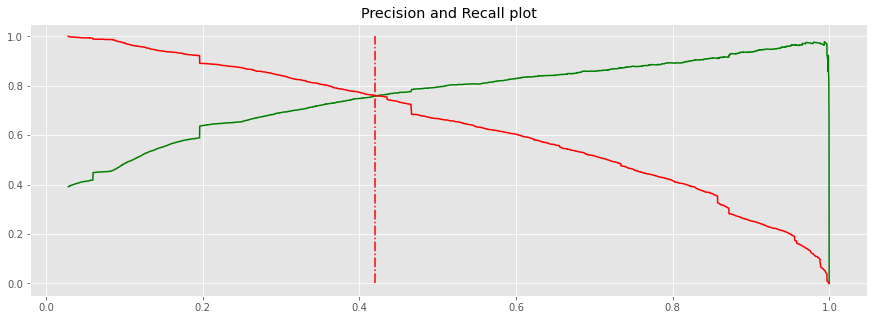

In [146]:
# Plot precisio and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42, ymax=1, ymin=0.0, colors="r", linestyles="-.")
plt.title("Precision and Recall plot")
plt.show()

## 8. Making predictions on the test set

In [147]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4269,0,0,8.0,1011,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2376,0,0,0.0,0,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7766,0,0,5.0,59,5.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9199,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,0,0.0,0,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [148]:
## scale Datasets

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_test[cols] = scaler.transform(X_test[cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4269,0,0,1.749143,0.964504,2.613424,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2376,0,0,-1.149699,-0.885371,-1.085519,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7766,0,0,0.662077,-0.777416,1.226321,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9199,0,0,-1.149699,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,0,-1.149699,-0.885371,-1.085519,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [149]:
id_cols = X_train_new.columns
id_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [150]:
# assign the identified columns

X_test = X_test[id_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,0,1,0,0,0,1,0,0,1,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0


In [151]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [152]:
y_test_pred = ver.predict(X_test_sm)
y_test_pred[:10]

4269    0.694397
2376    0.871694
7766    0.820213
9199    0.059825
4359    0.857213
9186    0.522337
1631    0.399609
8963    0.130661
8007    0.053606
5324    0.312710
dtype: float64

In [153]:
# Converte to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4269,0.694397
2376,0.871694
7766,0.820213
9199,0.059825
4359,0.857213


In [154]:

y_test_df = pd.DataFrame(y_test)

y_test_df['Lead ID'] = y_test_df.index


In [155]:

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.694397
1,1,2376,0.871694
2,1,7766,0.820213
3,0,9199,0.059825
4,1,4359,0.857213


In [157]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,4269,1,0.694397
1,2376,1,0.871694
2,7766,1,0.820213
3,9199,0,0.059825
4,4359,1,0.857213


In [158]:
# Creating column "Lead Score" where values Ranging from 1 to 100
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.694397,69
1,2376,1,0.871694,87
2,7766,1,0.820213,82
3,9199,0,0.059825,6
4,4359,1,0.857213,86


In [159]:
#Taking 0.42 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [160]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,4269,1,0.694397,69,1
1,2376,1,0.871694,87,1
2,7766,1,0.820213,82,1
3,9199,0,0.059825,6,0
4,4359,1,0.857213,86,1


In [161]:

print("Accuracy",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy 0.8084415584415584


#### Over All Accuracy is almost 81% which is a good value for a model

In [162]:
## creating Confusion Matrix to calculate the model sensitivity and specificity

confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1429,  248],
       [ 283,  812]], dtype=int64)

In [163]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
print("Specificity of the model on test data is:",TN / float(TN+FP))

print("Sensitivity:",TP / float(TP+FN))

Specificity of the model on test data is: 0.8521168753726893
Sensitivity: 0.7415525114155251


#### Model Specificity is 82.4 % and Sensitivity is 74% , which are good values for this model.

## 7. Observations

 ### 1.The Following Variables are the potential features to identify the 'Hot Leads' According to the model analysis
        1. The total time spend on the Website
        2. current occupation
        3. Lead origins
        4. Do not Email Flag
        5. Last Activity
        6. Lead Source

### 2. Customers who comes under below catagory are more likely to be turn to porential buyer

        1. customers current occupation is 'Working Professional'
        2. 'Total Time Spent on Website' is high
        3. Lead Sources are from  - Welingak Website & References
        4. Lead Origin in 'Landing Page Submission' or 'Lead Add Form'
    
 ### 3. If the Last activity of the customer is one of the catagory below, then the customer is a 'Hot_Lead'
 
        1. Converted to Lead
        2. Had a Phone Conversation
        3. Olark Chat Conversation
        4. SMS Sent


## 8. Identiying Leads

In [165]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,4269,1,0.694397,69,1
1,2376,1,0.871694,87,1
2,7766,1,0.820213,82,1
3,9199,0,0.059825,6,0
4,4359,1,0.857213,86,1


In [166]:
Hot_Leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=80]

Hot_Leads.head(20)

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
1,2376,1,0.871694,87,1
2,7766,1,0.820213,82,1
4,4359,1,0.857213,86,1
13,2907,1,0.886025,89,1
15,493,1,0.857213,86,1
26,5440,0,0.824450,82,1
33,8429,1,0.987933,99,1
40,1200,1,0.972824,97,1
49,5638,1,0.981511,98,1
54,7631,1,0.844469,84,1


#### The records in the Hot_Leads are the potential customers. 
#### From the lead score table, we can consider the top leads whose score is above 80% and they have higher chance of getting converted.
#### The lead conversion rate would go up if the sales team focus more on communicating with the Hot Leads rather than making calls to everyone.